#**INSTALANDO COMPONENTES**

# Acessando o Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Instalando o PySpark

In [3]:
import os
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
!tar -xf spark-3.3.3-bin-hadoop3.tgz
!rm -rf spark-3.3.3-bin-hadoop3.tgz
!pip install -q findspark
os.environ['JAVA_HOME'] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ['SPARK_HOME'] = "/content/spark-3.3.3-bin-hadoop3"
import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName('coracao').getOrCreate()

#Instalando o Hadoop

In [23]:
!wget -q https://downloads.apache.org/hadoop/common/hadoop-3.4.1/hadoop-3.4.1.tar.gz
!tar -xzf hadoop-3.4.1.tar.gz
!cp -r hadoop-3.4.1 /usr/local/

!echo 'export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64' >> /usr/local/hadoop-3.4.1/etc/hadoop/hadoop-env.sh

os.environ['HADOOP_HOME'] = "/usr/local/hadoop-3.4.1"


!$HADOOP_HOME/bin/hadoop version

Hadoop 3.4.1
Source code repository https://github.com/apache/hadoop.git -r 4d7825309348956336b8f06a08322b78422849b1
Compiled by mthakur on 2024-10-09T14:57Z
Compiled on platform linux-x86_64
Compiled with protoc 3.23.4
From source with checksum 7292fe9dba5e2e44e3a9f763fce3e680
This command was run using /usr/local/hadoop-3.4.1/share/hadoop/common/hadoop-common-3.4.1.jar


# Instalando Componentes de Analise de Dados

In [4]:
!pip install pandas numpy openpyxl nbformat ipykernel plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bibliotecas de Machine Learning

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import train_test_split

# **UTILIZANDO FERRAMENTAS**

# Análise de Dados com Pandas

In [8]:
df = pd.read_csv('/content/drive/MyDrive/heart-disease.csv')

In [9]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [10]:
df["target"].value_counts()

,count
target,
1,165
0,138


In [11]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Frequency')

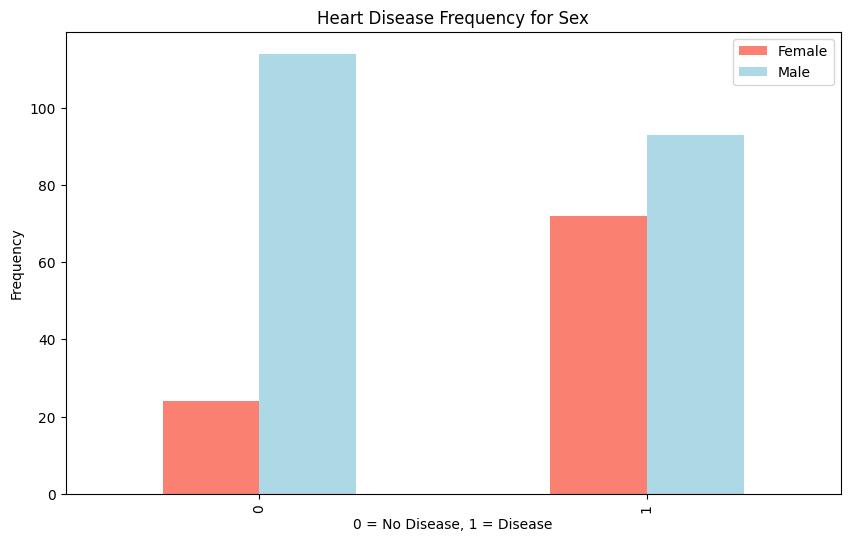

In [12]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10, 6), color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"])
plt.ylabel("Frequency")


Text(0, 0.5, 'frequencia cardiaca')

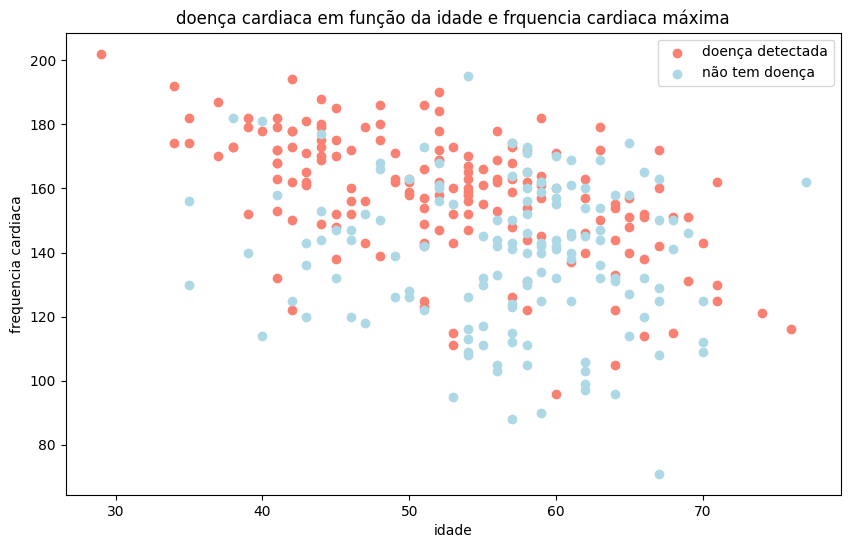

In [13]:
plt.figure(figsize=(10, 6))

#valores positivos (tem a doença)
plt.scatter(df["age"] [df["target"] == 1], df["thalach"][df["target"]== 1], c="salmon")

#valores negativos (não tem a doença)
plt.scatter(df["age"][df["target"] == 0], df["thalach"][df["target"] ==0], c="lightblue")

plt.title("doença cardiaca em função da idade e frquencia cardiaca máxima")
plt.xlabel("idade")
plt.legend(["doença detectada", "não tem doença"])
plt.ylabel("frequencia cardiaca")

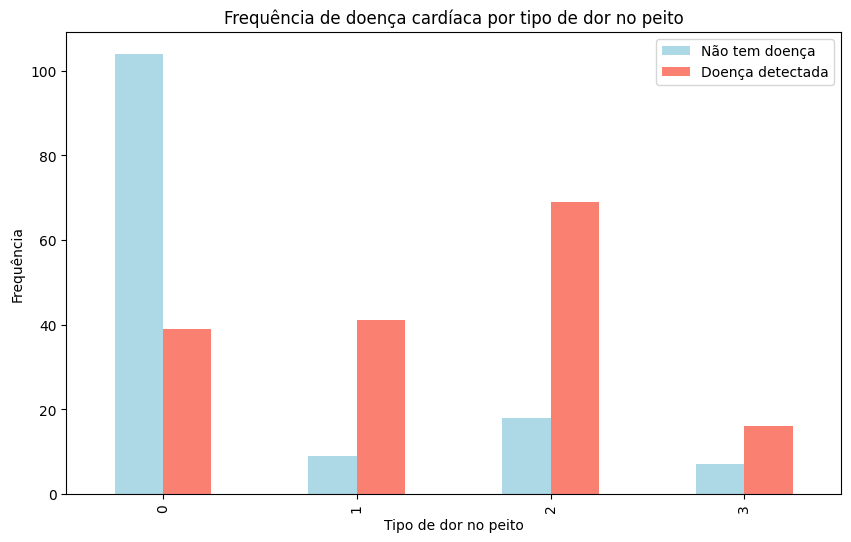

In [14]:
cross_tab = pd.crosstab(df["cp"], df["target"])


cross_tab.plot(kind="bar", figsize=(10, 6), color=["lightblue", "salmon"])

plt.title("Frequência de doença cardíaca por tipo de dor no peito")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("Frequência")
plt.legend(["Não tem doença", "Doença detectada"])



# Utilizando Mapper

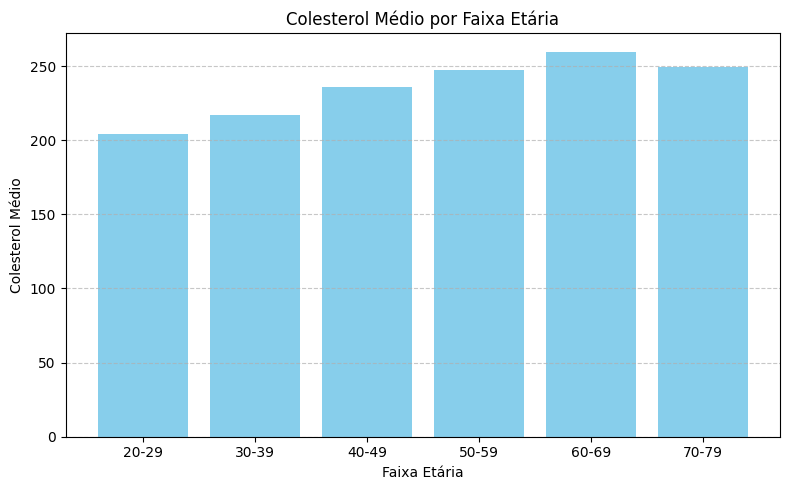

In [15]:
import matplotlib.pyplot as plt
from collections import defaultdict

def mapper(row):
    idade = int(row['age'])
    faixa = f"{(idade // 10) * 10}-{(idade // 10) * 10 + 9}"
    colesterol = int(row['chol'])
    return (faixa, colesterol)

grupos = defaultdict(list)

for row in df.to_dict(orient='records'):
    try:
        faixa, colesterol = mapper(row)
        grupos[faixa].append(colesterol)
    except (ValueError, KeyError):
        continue

faixas = sorted(grupos.keys())
medias = [sum(grupos[faixa]) / len(grupos[faixa]) for faixa in faixas]


plt.figure(figsize=(8, 5))
plt.bar(faixas, medias, color='skyblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Colesterol Médio')
plt.title('Colesterol Médio por Faixa Etária')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Utilizando Machine Learning

In [16]:
X = df.drop("target", axis=1)
Y = df["target"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
len(X_train), len(Y_train)

(242, 242)

In [18]:
len(X_test), len(Y_test)

(61, 61)

In [19]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()
          }
def fit_and_score(models, X_train, X_test, Y_train, Y_test):

  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, Y_train)

    model_scores[name] = model.score(X_test, Y_test)

  return model_scores

In [20]:
fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5737704918032787,
 'Logistic Regression': 0.8032786885245902,
 'Random Forest': 0.7868852459016393}

# Análise com PySpark


In [21]:
df_Spark = spark.read.csv('/content/drive/MyDrive/heart-disease.csv', header=True)
df_Spark.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|      0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

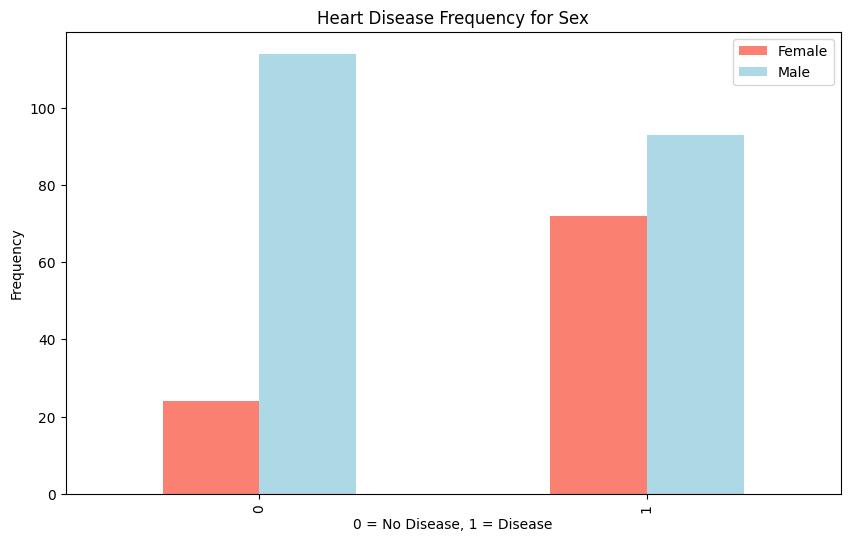

In [22]:
from pyspark.sql.functions import col

cross_tab = df_Spark.groupBy("target").pivot("sex").count().orderBy("target")

cross_tab_pd = cross_tab.toPandas()

cross_tab_pd.columns = ["target", "Female", "Male"]

cross_tab_pd.plot(kind="bar", x="target", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"])
plt.ylabel("Frequency")
plt.show()

# Análise com Hadoop (adaptado com pandas)

In [25]:
import pandas as pd

hadoop_df = df.copy()

hadoop_df.to_csv("heart-disease.csv", index=False)

!mkdir -p /usr/local/hadoop_tmp/
!cp dados_hadoop.csv /usr/local/hadoop_tmp/

!$HADOOP_HOME/bin/hadoop fs -mkdir -p /user/data/
!$HADOOP_HOME/bin/hadoop fs -put -f /usr/local/hadoop_tmp/dados_hadoop.csv /user/data/

In [26]:
df_pandas = pd.read_csv("heart-disease.csv")
print(df_pandas.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


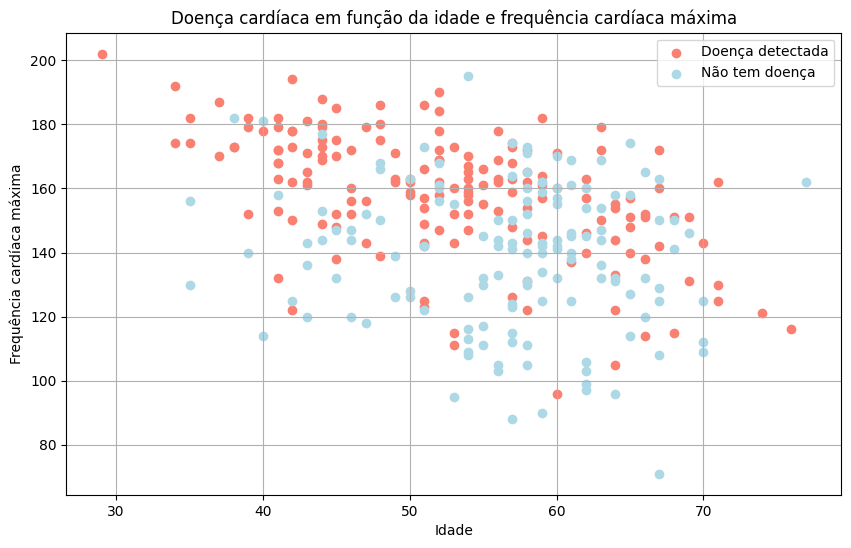

In [27]:

df_hadoop = df_pandas.copy()

plt.figure(figsize=(10, 6))

plt.scatter(df["age"][df["target"] == 1],
            df["thalach"][df["target"] == 1],
            c="salmon")

plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"] == 0],
            c="lightblue")

plt.title("Doença cardíaca em função da idade e frequência cardíaca máxima")
plt.xlabel("Idade")
plt.ylabel("Frequência cardíaca máxima")
plt.legend(["Doença detectada", "Não tem doença"])
plt.grid(True)
plt.show()